In [1]:
from process_edus import EDUSample

In [2]:
data = EDUSample()
path = r'../LabeledEDUS.txt'
dataset = []

for i in range(1, 6):
    X_train_vector, y_train, X_test_vector, y_test = \
                    data.split_vectorize(path, ngram=(1, i))
    dataset.append({
        'X_train': X_train_vector, 
        'y_train': y_train, 
        'X_test': X_test_vector, 
        'y_test': y_test
    })

=====> DATA LOADED
=====> DATA VECTORIZED
	 ngram range  (1, 1)

                    X_train_vector shape: (1341, 361)
                    y_train shape: (1341,)
                    X_test_vector shape: (671, 361)
                    y_test shape: (671,)        
        
=====> DATA LOADED
=====> DATA VECTORIZED
	 ngram range  (1, 2)

                    X_train_vector shape: (1341, 620)
                    y_train shape: (1341,)
                    X_test_vector shape: (671, 620)
                    y_test shape: (671,)        
        
=====> DATA LOADED
=====> DATA VECTORIZED
	 ngram range  (1, 3)

                    X_train_vector shape: (1341, 681)
                    y_train shape: (1341,)
                    X_test_vector shape: (671, 681)
                    y_test shape: (671,)        
        
=====> DATA LOADED
=====> DATA VECTORIZED
	 ngram range  (1, 4)

                    X_train_vector shape: (1341, 690)
                    y_train shape: (1341,)
                    X_

In [3]:
data.nzp

(1063, 1209, 949)

In [4]:
import numpy as np

# Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC, NuSVC

# Hyper-parameter tuning
from sklearn.model_selection import GridSearchCV, ParameterGrid

# Performance 
from sklearn.metrics import make_scorer, classification_report, confusion_matrix

# Visualiuzations
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

#### Logistic Regression

In [5]:
lr = LogisticRegression(random_state=42)

In [6]:
PG = ParameterGrid({
    'penalty': [['l1', 'l2']],
    'C': [[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]]
})

In [7]:
grid_search = GridSearchCV(lr, PG)

In [8]:
list(PG)

[{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}]

In [9]:
c_data = dataset[0] 
X_train, y_train, X_test, y_test = \
    c_data['X_train'], c_data['y_train'], c_data['X_test'], c_data['y_test']

In [11]:
grid_search.best_params_

{'C': 0.0001, 'penalty': 'l2'}

In [12]:
preds = grid_search.best_estimator_.predict(X_test)

Text(89.18, 0.5, 'predicted label')

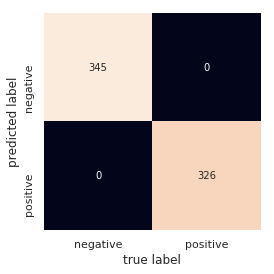

In [13]:
mat = confusion_matrix(preds, y_test)
    
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
        xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])

plt.xlabel('true label')
plt.ylabel('predicted label')